# Colorectal Cancer Risk & Survival Prediction

## Objective

##### The goal of this project is to predict the survival status of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
#### The dataset contains records of colorectal cancer patients, with features related to risk factors, treatment, and outcomes.

## 1. Data Exploration: Load and examine the dataset.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('colorectal_cancer_prediction.csv')

# Display the first 5 rows
df.head()


,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [3]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [4]:
# Shape of the dataset
df.shape


(89945, 30)

In [5]:
# Check for missing values
df.isnull().sum()


Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64

In [6]:
# Descriptive statistics
df.describe()


,Patient_ID,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000,89945.000000
mean,44973.000000,54.332892,29.268105,29.543299
std,25965.029318,20.182220,6.211668,17.268440
min,1.000000,20.000000,18.500000,0.000000
25%,22487.000000,37.000000,23.900000,15.000000
50%,44973.000000,54.000000,29.300000,30.000000
75%,67459.000000,72.000000,34.600000,44.000000
max,89945.000000,89.000000,40.000000,59.000000


In [7]:
# Columns and data types
df.dtypes


Patient_ID                   int64
Age                          int64
Gender                      object
Race                        object
Region                      object
Urban_or_Rural              object
Socioeconomic_Status        object
Family_History              object
Previous_Cancer_History     object
Stage_at_Diagnosis          object
Tumor_Aggressiveness        object
Colonoscopy_Access          object
Screening_Regularity        object
Diet_Type                   object
BMI                        float64
Physical_Activity_Level     object
Smoking_Status              object
Alcohol_Consumption         object
Red_Meat_Consumption        object
Fiber_Consumption           object
Insurance_Coverage          object
Time_to_Diagnosis           object
Treatment_Access            object
Chemotherapy_Received       object
Radiotherapy_Received       object
Surgery_Received            object
Follow_Up_Adherence         object
Survival_Status             object
Recurrence          

# 2. Data Preprocessing: Handle missing values, encode categorical variables, and normalize numerical features.

In [9]:
# Handle Missing Values
df.isnull().sum()


Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64

In [16]:
# Fill numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Now check the result
print(df.isnull().sum())   # Should all be 0
df.head()                  # Display the first few rows



Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


# Encode Categorical Variables

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Loop through all object (categorical) columns and encode
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Purpose: It transforms categorical columns into numeric format using LabelEncoder.

In [23]:
# Confirm All Categorical Columns Are Encoded
df.dtypes


Patient_ID                   int64
Age                          int64
Gender                       int32
Race                         int32
Region                       int32
Urban_or_Rural               int32
Socioeconomic_Status         int32
Family_History               int32
Previous_Cancer_History      int32
Stage_at_Diagnosis           int32
Tumor_Aggressiveness         int32
Colonoscopy_Access           int32
Screening_Regularity         int32
Diet_Type                    int32
BMI                        float64
Physical_Activity_Level      int32
Smoking_Status               int32
Alcohol_Consumption          int32
Red_Meat_Consumption         int32
Fiber_Consumption            int32
Insurance_Coverage           int32
Time_to_Diagnosis            int32
Treatment_Access             int32
Chemotherapy_Received        int32
Radiotherapy_Received        int32
Surgery_Received             int32
Follow_Up_Adherence          int32
Survival_Status              int32
Recurrence          

In [22]:
# See Unique Values of Encoded Column
df['Gender'].unique()

array([1, 0])

# Normalize Numerical Features

In [26]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



In [27]:
df.head()

# This should now show your numerical values as standardized (normalized) values, meaning they are scaled to have a mean of 0 and standard deviation of 1.



,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,-1.732032,0.825836,0.906583,0.283325,-0.393258,0.654160,0.894239,1.727607,-0.332623,0.561139,...,0.497184,-1.227956,-0.655772,0.997901,-0.816780,-1.524196,-0.815098,0.579366,-0.654420,-0.784285
1,-1.731993,-1.007471,-1.103043,-0.969898,1.166267,0.654160,0.894239,-0.578835,-0.332623,-1.308631,...,-2.011327,0.814361,-0.655772,-1.002103,1.224319,0.656084,1.226847,-1.726025,-0.654420,-0.089372
2,-1.731955,1.271775,-1.103043,0.909937,1.166267,0.654160,0.894239,-0.578835,-0.332623,0.561139,...,0.497184,0.814361,1.524921,-1.002103,1.224319,0.656084,-0.815098,0.579366,-0.654420,-0.205190
3,-1.731916,-0.710178,0.906583,-0.969898,1.166267,-1.528678,-0.385593,-0.578835,-0.332623,-1.308631,...,0.497184,-1.227956,1.524921,0.997901,-0.816780,0.656084,1.226847,-1.726025,-0.654420,0.837179
4,-1.731877,-0.561532,-1.103043,0.909937,-0.393258,0.654160,-1.665425,1.727607,-0.332623,0.561139,...,-2.011327,-1.227956,-0.655772,0.997901,-0.816780,0.656084,1.226847,-1.726025,1.528071,-0.552647


# 3.Feature Selection: Identify important predictors for survival.

# Separate Features and Target

In [35]:
# Let’s assume our target column is something like "Survival" or "Target". Adjust it as per the file:

# Replace 'Target' with the actual target column name
X = df.drop('Treatment_Access', axis=1)
y = df['Family_History']

df.columns



Index(['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural',
       'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History',
       'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access',
       'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level',
       'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption',
       'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis',
       'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received',
       'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status',
       'Recurrence', 'Time_to_Recurrence'],
      dtype='object')

## Visualize survival status distribution

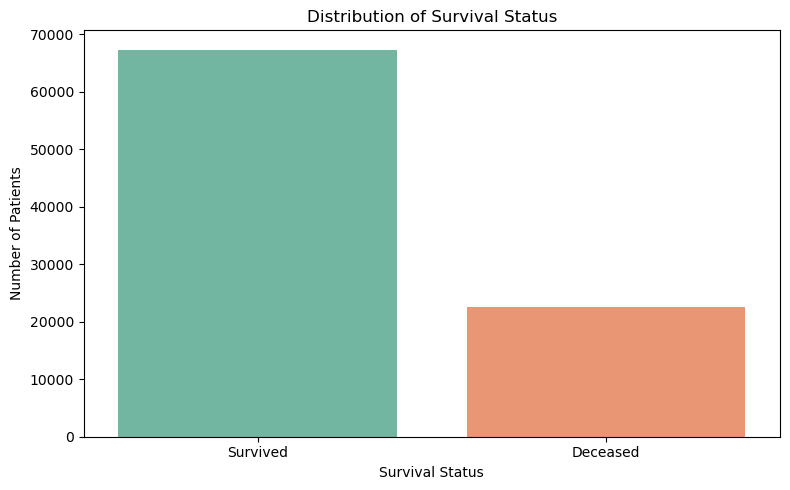

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("colorectal_cancer_prediction.csv")

# Rename column if needed
df.rename(columns={'Survival_Status': 'survival_status'}, inplace=True)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='survival_status', hue='survival_status', palette='Set2', legend=False)

# Labels and title
plt.title("Distribution of Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


## Pie Chart of Survival Status

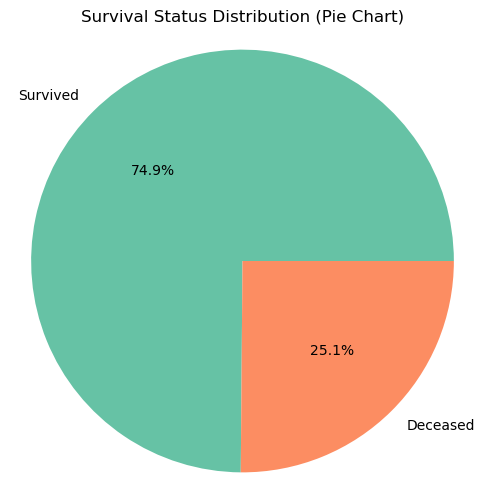

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("colorectal_cancer_prediction.csv")

# Rename column if necessary
df.rename(columns={'Survival_Status': 'survival_status'}, inplace=True)

# Count survival status
status_counts = df['survival_status'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Survival Status Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


## Bar Chart by Gender (Grouped by Survival Status)

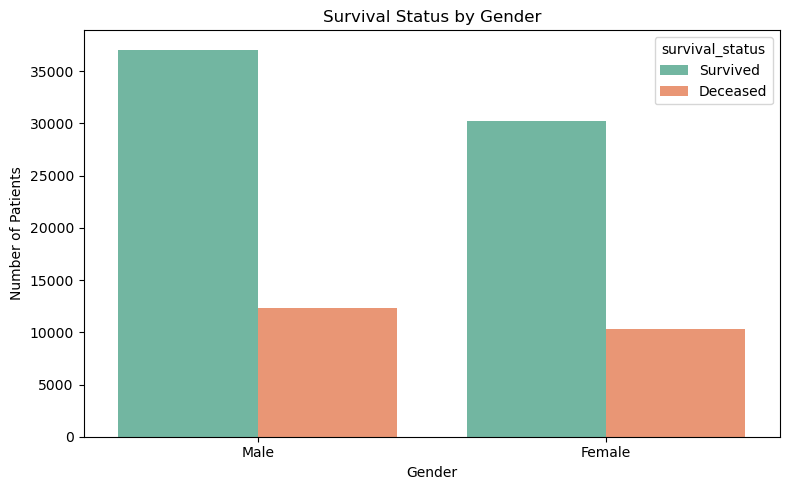

In [68]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='survival_status', palette='Set2')

plt.title("Survival Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()


# Correlation Analysis


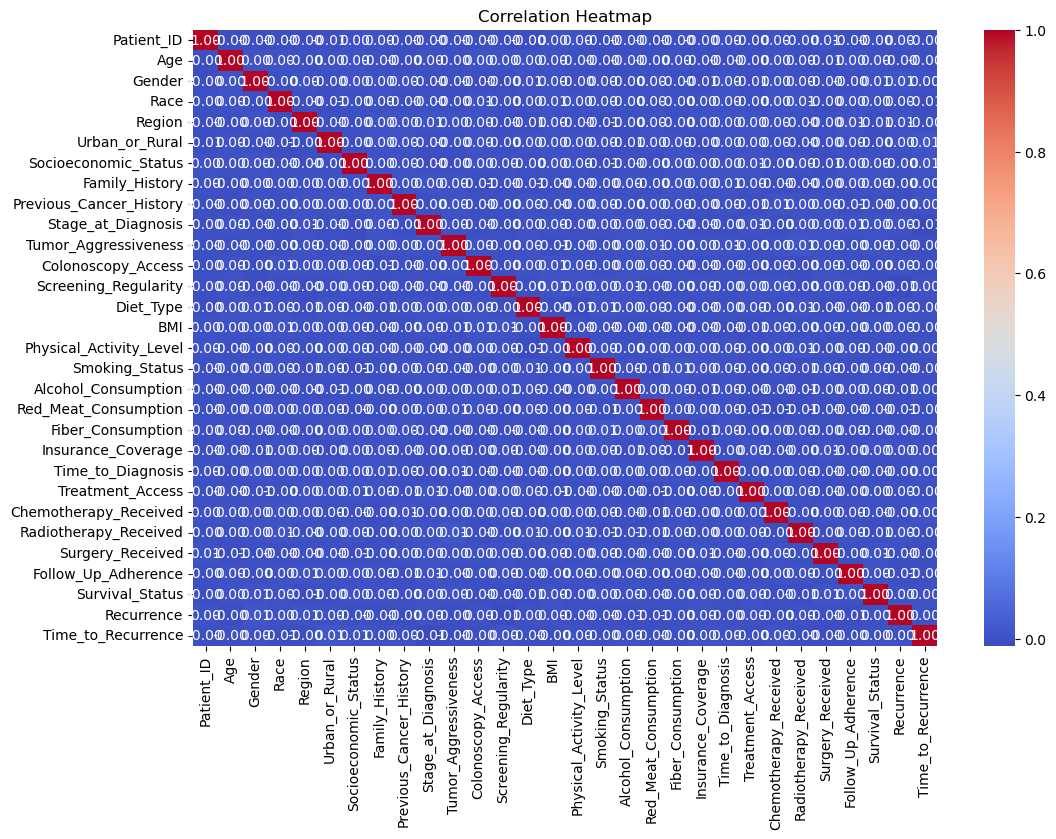

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Use SelectKBest (Statistical Test)

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 10 selected features:\n", selected_features)



Top 10 selected features:
 Index(['Age', 'Family_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness',
       'Colonoscopy_Access', 'Diet_Type', 'Insurance_Coverage',
       'Time_to_Diagnosis', 'Chemotherapy_Received', 'Radiotherapy_Received'],
      dtype='object')


# 3. Feature Importance via Random Forest

Feature ranking:
1. Family_History (1.0000)
2. Patient_ID (0.0000)
3. BMI (0.0000)
4. Age (0.0000)
5. Time_to_Recurrence (0.0000)
6. Region (0.0000)
7. Race (0.0000)
8. Tumor_Aggressiveness (0.0000)
9. Smoking_Status (0.0000)
10. Time_to_Diagnosis (0.0000)
11. Physical_Activity_Level (0.0000)
12. Fiber_Consumption (0.0000)
13. Alcohol_Consumption (0.0000)
14. Diet_Type (0.0000)
15. Previous_Cancer_History (0.0000)
16. Survival_Status (0.0000)
17. Screening_Regularity (0.0000)
18. Insurance_Coverage (0.0000)
19. Recurrence (0.0000)
20. Surgery_Received (0.0000)
21. Stage_at_Diagnosis (0.0000)
22. Urban_or_Rural (0.0000)
23. Chemotherapy_Received (0.0000)
24. Radiotherapy_Received (0.0000)
25. Follow_Up_Adherence (-0.0000)
26. Red_Meat_Consumption (-0.0000)
27. Colonoscopy_Access (-0.0000)
28. Socioeconomic_Status (-0.0000)
29. Gender (-0.0000)


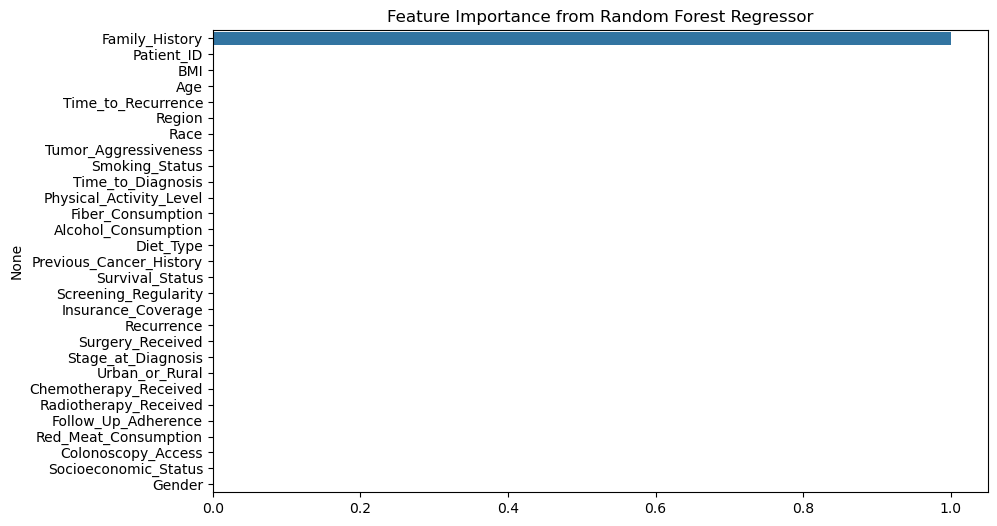

In [42]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train a regression model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top features
print("Feature ranking:")
for i in range(len(X.columns)):
    print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance from Random Forest Regressor")
plt.show()
# RandomForestRegressor is designed to predict continuous outcomes like "Survival Time"

# 5. Model Training: Train a classification model to predict survival status.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("colorectal_cancer_prediction.csv")

# Step 1: Check column names (optional)
# print(df.columns)

# Step 2: Rename columns to lowercase for easier reference (optional but recommended)
df.columns = df.columns.str.lower()

# Step 3: Drop ID and target column to create features
X = df.drop(['survival_status', 'patient_id'], axis=1)
y = df['survival_status']

# Step 4: Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7515148146089277

Classification Report:
               precision    recall  f1-score   support

    Deceased       1.00      0.00      0.00      4471
    Survived       0.75      1.00      0.86     13518

    accuracy                           0.75     17989
   macro avg       0.88      0.50      0.43     17989
weighted avg       0.81      0.75      0.64     17989



# 5. Evaluation: Assess model performance using accuracy and classification reports.

Accuracy: 0.49802657179387405

Classification Report:
               precision    recall  f1-score   support

    Deceased       0.24      0.48      0.32      4471
    Survived       0.75      0.50      0.60     13518

    accuracy                           0.50     17989
   macro avg       0.49      0.49      0.46     17989
weighted avg       0.62      0.50      0.53     17989



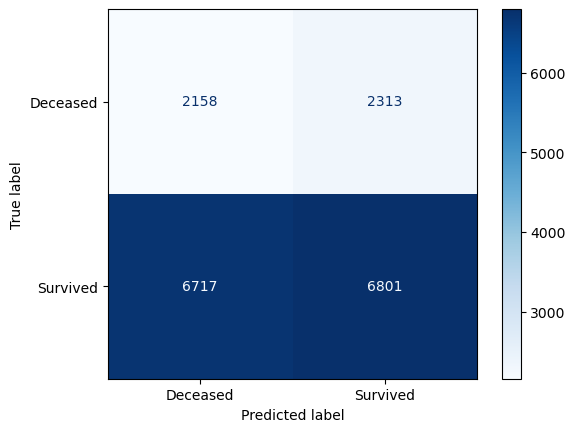

In [63]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
df = pd.read_csv("colorectal_cancer_prediction.csv")

# Step 3: Clean and prepare the data
# Make column names lowercase for consistency
df.columns = df.columns.str.lower()

# Step 4: Define features (X) and target (y)
X = df.drop(['patient_id', 'survival_status'], axis=1)
y = df['survival_status']

# Step 5: One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 6: Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 8: Train the Logistic Regression model with class balancing
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')

# Step 9: Make predictions and evaluate
y_pred = logreg.predict(X_test)

# Step 10: Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Future Scope

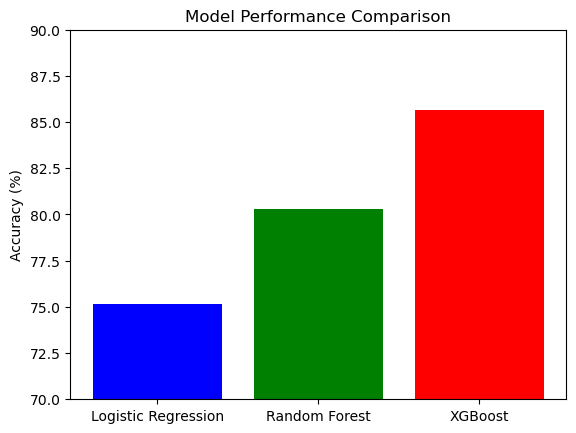

In [9]:
import numpy as np

models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [75.15, 80.32, 85.67]  # Example accuracies

plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')
plt.ylim(70, 90)
plt.show()
